In [112]:
from random import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [113]:
hi = pd.read_csv('mnist_train.csv', header=None)

number_data = hi.drop(hi.index[0])

number_data = number_data.reset_index(drop=True)

number_data.sample(10)

/var/folders/rd/zz5zhdcs41z_jyc6z4nvg_5r0000gn/T/ipykernel_20232/3172347458.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
2925,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21574,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34061,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59022,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44180,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24483,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40812,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
print(number_data.info())
number_data = number_data.astype(float)
print(number_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: object(785)
memory usage: 359.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 359.3 MB
None


In [115]:
number_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
number_data.shape

(60000, 785)

In [117]:
number_data = number_data.sample(frac=0.05).reset_index(drop=True)

number_data.shape

(3000, 785)

In [118]:
column_1_dtype = number_data.iloc[:, 0].dtype
print(column_1_dtype)

float64


In [119]:
unique_values_column_1 = number_data.iloc[:, 0].unique()
print(unique_values_column_1)

[8. 0. 9. 5. 7. 6. 2. 3. 1. 4.]


In [120]:
import pandas as pd


def convert_to_string(value):
    if isinstance(value, str):
        return int(value)
    
    else:
        return value


number_data.iloc[:, 0] = number_data.iloc[:, 0].apply(convert_to_string)


print(number_data)


      0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0     8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2995  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2996  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2997  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2998  9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2999  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      778  779  780  781  782  783  784  
0     0.0  0.0  0.0  

In [121]:
sorted(number_data[0].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [122]:
lookup = { 0: '0', 1: '1', 2: '2', 3: '3', 
           4: '4', 5: '5', 6: '6', 7: '7', 
           8: '8', 9: '9'}

In [123]:
features = number_data[number_data.columns[1:]]

target = number_data[0]

In [124]:
features.shape

(3000, 784)

In [125]:
features = features.values.reshape(len(features), 28, 28)

In [126]:
features.shape

(3000, 28, 28)

In [127]:
target.loc[10]

6.0

In [128]:
features[10][10:20]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         23., 158., 254., 242.,  92.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        210., 254., 192.,  24.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  45., 105.,
        230., 184.,  23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 200., 254.,
        179.,  20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93., 254., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [129]:
def show_image(features, actual_label):
    
    print("Actual label: ", lookup[actual_label])
    plt.imshow(features, cmap='Greys')
    
    plt.show()

Actual label:  6


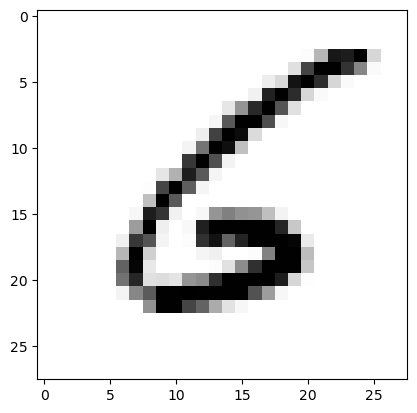

In [130]:
show_image(features[10], target[10])

Actual label:  0


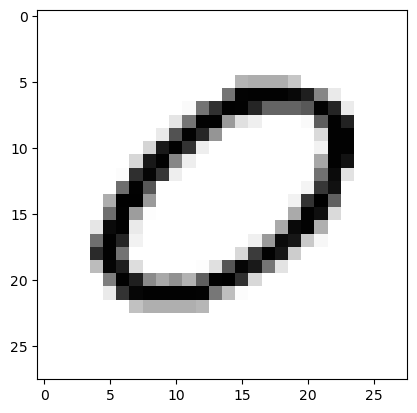

In [131]:
show_image(features[20], target[20])

#### Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255

In [132]:
features = features.astype(np.float32) / 255

In [133]:
features[10][10:20]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.09019608, 0.61960787, 0.99607843, 0.9490196 ,
        0.36078432, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8235294 , 0.99607843, 0.7529412 , 0.09411765,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1764706 ,
        0.4117647 , 0.9019608 , 0.72156864, 0.09019608, 0.        ,
        0.        , 0.    

### Splitting dataset into training and testing data

In [134]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(features,
                                                                        target,
                                                                        test_size=0.2)

In [135]:
train_images.shape

(2400, 28, 28)

In [136]:
test_images.shape

(600, 28, 28)

In [137]:
stacked_encoder = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(64, activation="elu"),
    layers.Dense(32, activation="elu"),
    
    layers.Dense(16, activation="elu")
])

In [138]:
stacked_encoder.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                50240     
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
Total params: 52848 (206.44 KB)
Trainable params: 52848 (206.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Building stacked decoder

In [139]:
stacked_decoder = tf.keras.models.Sequential([
    
    layers.Dense(32, activation="elu", input_shape=[16]),

    layers.Dense(64, activation="elu"),
    
    layers.Dense(28 * 28, activation="elu"),
                                           
    layers.Reshape([28, 28])
])

In [140]:
stacked_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dense_23 (Dense)            (None, 784)               50960     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 53616 (209.44 KB)
Trainable params: 53616 (209.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 16)                52848     
                                                                 
 sequential_10 (Sequential)  (None, 28, 28)            53616     
                                                                 
Total params: 106464 (415.88 KB)
Trainable params: 106464 (415.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


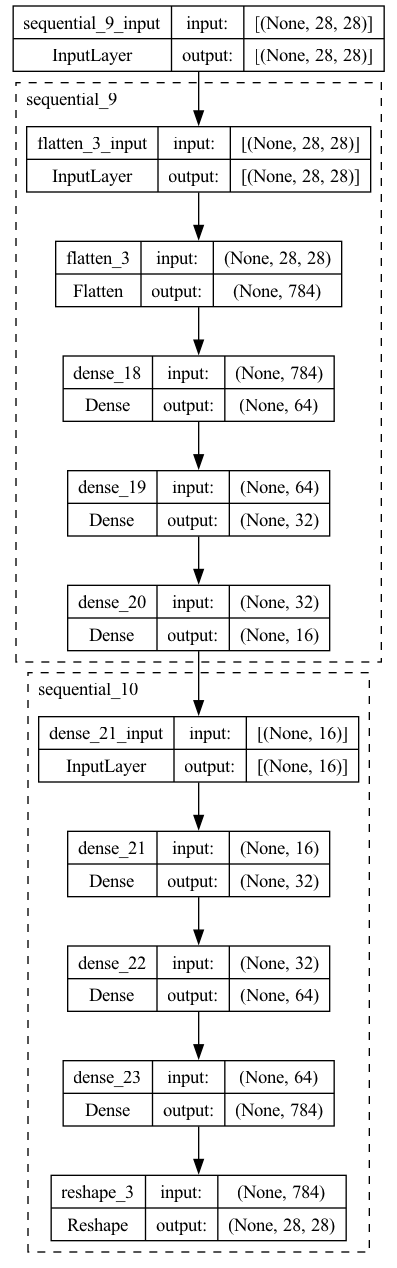

In [142]:
keras.utils.plot_model(ae_model, expand_nested=True, show_shapes=True)

In [143]:
ae_model.compile(loss='mean_squared_error',
                 optimizer=tf.keras.optimizers.RMSprop(), 
                 metrics=['mse'])

### Training autoencoder

In [144]:
training_hist = ae_model.fit(train_images, 
                             train_images, 
                             epochs=20)

Epoch 1/20
75/75 [==============================] - 0s 1ms/step - loss: 0.0757 - mse: 0.0757
Epoch 2/20
75/75 [==============================] - 0s 1ms/step - loss: 0.0611 - mse: 0.0611
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0554 - mse: 0.0554
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0511 - mse: 0.0511
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0475 - mse: 0.0475
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0444 - mse: 0.0444
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0419 - mse: 0.0419
Epoch 8/20
75/75 [==============================] - 0s 2ms/step - loss: 0.0400 - mse: 0.0400
Epoch 9/20
75/75 [==============================] - 0s 1ms/step - loss: 0.0386 - mse: 0.0386
Epoch 10/20
75/75 [==============================] - 0s 1ms/step - loss: 0.0375 - mse: 0.0375
Epoch 11/20
75/75 [==============================] - 0s 2ms/step - lo

### Reconstructing image

In [145]:
def reconstruct_img(model, images, n_imgs):
    
    random_int = randint(0, images.shape[0] - n_imgs)
    
    reconstructions = model.predict(images[random_int : random_int + n_imgs])
    
    fig = plt.figure(figsize=(n_imgs * 3, 3))
    
    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index], cmap='Greys')
        
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index], cmap='Greys')

1/1 [==============================] - 0s 43ms/step


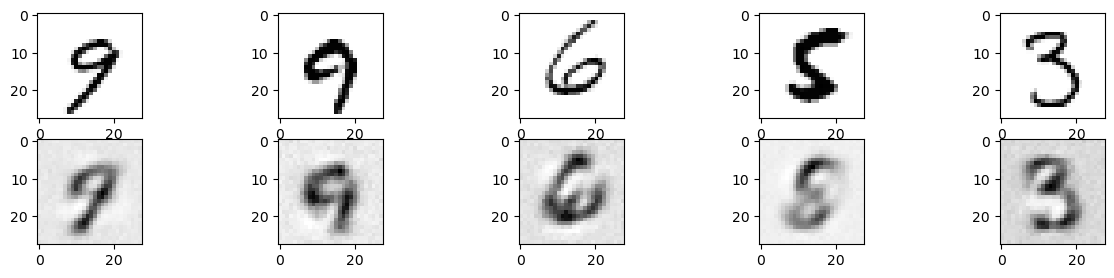

In [146]:
reconstruct_img(ae_model, test_images, 5)